In [2]:
#getting data from quandl

import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [8]:
quandl.ApiConfig.api_key = '****************'

#getting wiki amazon data
df = quandl.get("WIKI/MSFT")
#only have adjusted close price
df = df[['Adj. Close']]
df

,Adj. Close
Date,
1986-03-13,0.064720
1986-03-14,0.067031
1986-03-17,0.068187
1986-03-18,0.066454
1986-03-19,0.065298
...,...
2018-03-21,92.480000
2018-03-22,89.790000
2018-03-23,87.180000


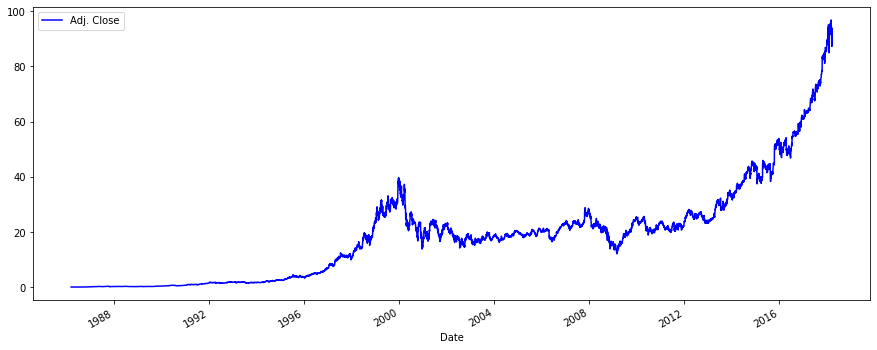

In [9]:
#plot adjusted close price

df['Adj. Close'].plot(figsize=(15,6), color='b')
plt.legend(loc='upper left')
plt.show()

In [10]:
#processed data and created features and labels array 

forecast = 30
df['Prediction'] = df[['Adj. Close']].shift(-forecast)

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]

In [11]:
#created test and trained data set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#fit the model
clf = LinearRegression()
clf.fit(X_train, y_train)

#check accuracy
confidence = clf.score(X_test, y_test)

#predict values
forecast_predicted = clf.predict(X_forecast)

forecast_predicted

array([91.9629484 , 92.96753767, 94.86395619, 94.18739607, 94.92546165,
       93.66459961, 93.92087239, 96.29908371, 97.6932076 , 96.44259647,
       96.0018073 , 95.0587235 , 95.26374171, 95.86854546, 95.54051631,
       96.0940655 , 96.67836742, 98.84130962, 99.07708057, 96.6578656 ,
       96.08381459, 96.42209464, 96.8526329 , 95.09972714, 95.345749  ,
       94.67943979, 91.92194476, 89.24645702, 96.01205821, 91.59391561])

(17282.0, 17647.0)

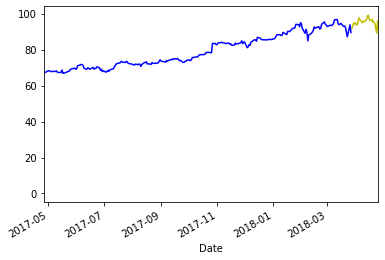

In [12]:
#plot prediction
dates = pd.date_range(start = "2018-03-28", end="2018-04-26")
plt.plot(dates,forecast_predicted, color = 'y')
df['Adj. Close'].plot(color='b')
plt.xlim(xmin=datetime.date(2017,4,26), xmax=datetime.date(2018,4,26))